In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this notebook we are going to try to predict how much money the company gifts to their donnnor to promote them to keep donating. Therefore, we will try to predict the column AVGGIFT. 

Let's load the dataset.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT4/DAY1/4.01 Using Regression to fill NaNs, HC4A/HC4A_unit4.csv')
display(data.shape)
data.head()

(90569, 28)

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,NaN,3712,XXXX,NaN,F,T2,NaN,NaN,479,...,NaN,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,NaN,5202,XXXX,NaN,M,S1,6.0,H,5468,...,NaN,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,NaN,0,XXXX,NaN,M,R2,3.0,U,497,...,NaN,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,NaN,2801,XXXX,NaN,F,R2,1.0,U,1000,...,NaN,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,NaN,2001,XXXX,X,F,S2,3.0,H,576,...,NaN,113,43,10,25,9702,L2F,37,14.0,6.864865


In [ ]:
data.isnull().sum()/len(data)
#data.isnull().sum()/data.shape[0]

STATE       0.000000
PVASTATE    0.984708
DOB         0.000000
MDMAUD      0.000000
RECP3       0.979761
GENDER      0.030860
DOMAIN      0.024026
INCOME      0.222847
HOMEOWNR    0.232431
HV1         0.000000
HV2         0.000000
HV3         0.000000
HV4         0.000000
IC1         0.000000
IC2         0.000000
IC3         0.000000
IC4         0.000000
IC5         0.000000
VETERANS    0.891287
NUMPROM     0.000000
CARDPROM    0.000000
CARDPM12    0.000000
NUMPRM12    0.000000
MAXADATE    0.000000
RFA_2       0.000000
NGIFTALL    0.000000
TIMELAG     0.106582
AVGGIFT     0.000000
dtype: float64

# Numerical columns

In [ ]:
numericals = data.select_dtypes(np.number)
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


## Dealing with missing values

In [ ]:
numericals.isnull().sum()/len(numericals)
#numericals.isnull().sum()/numericals.shape[0]

DOB         0.000000
INCOME      0.222847
HV1         0.000000
HV2         0.000000
HV3         0.000000
HV4         0.000000
IC1         0.000000
IC2         0.000000
IC3         0.000000
IC4         0.000000
IC5         0.000000
NUMPROM     0.000000
CARDPROM    0.000000
CARDPM12    0.000000
NUMPRM12    0.000000
MAXADATE    0.000000
NGIFTALL    0.000000
TIMELAG     0.106582
AVGGIFT     0.000000
dtype: float64

TIMELAG column has NA's.

### INCOME column

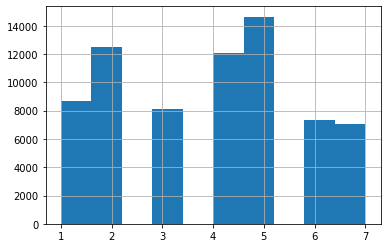

In [ ]:
numericals['INCOME'].hist();

The values of INCOME look a bit weird. What does it mean an income of 2 or 3? Let's see the unique values of INCOME

In [ ]:
numericals['INCOME'].unique()

array([nan,  6.,  3.,  1.,  4.,  2.,  7.,  5.])

In [ ]:
numericals['INCOME'].mean()

3.8782570397522234

#### Effect of different imputation techniques

Let's see the effect or replacing the missing values of INCOME with other values. To do it, we will first create an independent copy of the `numericals` dataframe just in case.

In [ ]:
numericals2 = numericals.copy()

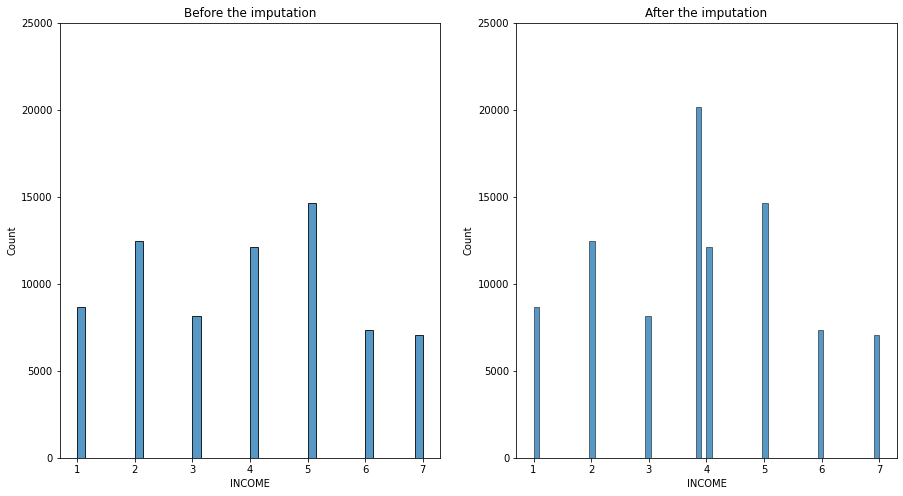

In [ ]:
# If we fill the NA's of "Income" with the mean...we will have
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.histplot(x="INCOME", data = numericals, ax = ax[0]);
ax[0].set_title("Before the imputation")
ax[0].set_ylim((0,25000))
new = numericals['INCOME'].fillna(data['INCOME'].mean())
sns.histplot(x=new, ax = ax[1])
ax[1].set_title("After the imputation")
ax[1].set_ylim((0,25000))
plt.show()

This approach, distorts the distribution... and even more a simple "mean" estrategy is not valid because the mean is around 3.78 which is not an integer value. We could consider to round this value to the nearest integer but we will worsen the problem because we will increase a lot the amount of rows for which the INCOME is 4. Therefore, the histogram will show a much higher bar at 4.

In [ ]:
numericals['INCOME'].mean()

3.8782570397522234

In [ ]:
numericals.shape

(90569, 19)

Let's try a better approach...

When we were filling the NA's with the mean, we've been using the information of one column "INCOME" to fill out the missing values. This estrategy is using information of only one column (univariate technique). However, is more likely that the value of the "INCOME" will depend on the values of the other columns for the given customer. Let's exploit this idea using the K-NN model (multivariate technique).

The idea is to train a K-NN model to predict the INCOME column using the other columns (excepting AVGGIT because for a new customer we will not know AVGGIFT). This model performs several steps. 

First, it will determine how similar is every customer with a missing value on the INCOME column against the other customers which **doesn't have a missing value on the INCOME column**. This "similarity" between customers will be based on some kind of distance (Euclidean, Manhattan,...etc) involving the values of the other columns of the customers. 

Second, the model will consider only the K most similar customers to the one for which we want to determine the value of INCOME. Among this subset of customers, the model will compute the mean of the INCOME column. 

Finally the missing value of the INCOME column for the given customer will be filled with the previous mean. 

We could do this manually but it will be vary tedious and prone to an error. Fortunatelly enough, sklearn can do this for us.



In [ ]:
numericals.dtypes

DOB           int64
INCOME      float64
HV1           int64
HV2           int64
HV3           int64
HV4           int64
IC1           int64
IC2           int64
IC3           int64
IC4           int64
IC5           int64
NUMPROM       int64
CARDPROM      int64
CARDPM12      int64
NUMPRM12      int64
MAXADATE      int64
NGIFTALL      int64
TIMELAG     float64
AVGGIFT     float64
dtype: object

In [ ]:
from sklearn.impute import KNNImputer

# This cell takes around 2mins. to be executed
imputer = KNNImputer(n_neighbors=3) # n_neighbors is how many most similar customers we want to consider to predict the INCOME

X_income = numericals.drop(['TIMELAG','AVGGIFT'],axis=1) # We drop "TIMELAG" because it contains NA's and AVGGIFT because is the y
X_income_imputed_np = imputer.fit_transform(X_income)
X_income_imputed_df = pd.DataFrame(X_income_imputed_np, columns=X_income.columns, index=X_income.index)
X_income_imputed_df.dtypes

DOB         float64
INCOME      float64
HV1         float64
HV2         float64
HV3         float64
HV4         float64
IC1         float64
IC2         float64
IC3         float64
IC4         float64
IC5         float64
NUMPROM     float64
CARDPROM    float64
CARDPM12    float64
NUMPRM12    float64
MAXADATE    float64
NGIFTALL    float64
dtype: object

In [ ]:
X_income_imputed_df['INCOME'].unique()

array([3.        , 6.        , 1.        , 5.33333333, 4.        ,
       2.        , 1.66666667, 7.        , 3.33333333, 4.66666667,
       4.33333333, 5.        , 3.66666667, 2.33333333, 5.66666667,
       2.66666667, 1.33333333, 6.66666667, 6.33333333])

This is a bit weird as the imputer has changed the type of the INCOME column from int to float. This is because, in general, the mean of several integer values will be a float number. We have to round the final values to the nearest integer.

In [ ]:
X_income_imputed_df['INCOME'] = X_income_imputed_df['INCOME'].apply(lambda x: int(round(x)))
X_income_imputed_df.dtypes

DOB         float64
INCOME        int64
HV1         float64
HV2         float64
HV3         float64
HV4         float64
IC1         float64
IC2         float64
IC3         float64
IC4         float64
IC5         float64
NUMPROM     float64
CARDPROM    float64
CARDPM12    float64
NUMPRM12    float64
MAXADATE    float64
NGIFTALL    float64
dtype: object

In [ ]:
X_income_imputed_df['INCOME'].unique()

array([3, 6, 1, 5, 4, 2, 7])

Now we need to replace the column INCOME in the old numericals dataframe.

#### Activity

Create a grid of three seaborn histogram plots in a row displaying:

* Left plot: histogram of the original "INCOME" column
* Middle plot: histogram of the "INCOME" column with NA's replaced by the mean of the "INCOME" column
* Right plot: histogram of the "INCOME" column with NA's replaced using the K-NN method.

Make sure to add the corresponding title to each plot and set the range of values of the "y" axis to (0,25000).

Comment the differences, and justify which method do you will use. 

In [ ]:
# Let's compare what happens now with the different imputation techniques.


In [ ]:
numericals['INCOME'] = X_income_imputed_df['INCOME']
numericals.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DOB            0
INCOME         0
HV1            0
HV2            0
HV3            0
HV4            0
IC1            0
IC2            0
IC3            0
IC4            0
IC5            0
NUMPROM        0
CARDPROM       0
CARDPM12       0
NUMPRM12       0
MAXADATE       0
NGIFTALL       0
TIMELAG     9653
AVGGIFT        0
dtype: int64

Clearly, this column will need to be transformed

In [ ]:
# save intermediate results
data['INCOME'] = numericals['INCOME']

In [ ]:
data['INCOME'].isna().sum()

0

In [ ]:
data.to_csv('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT4/DAY1/4.01 Using Regression to fill NaNs, HC4A/HC4A_unit4_ver1.csv', index=False)